In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
df= pd.read_csv("C:\\Users\\wldus\\Python\\Korea-Team11\\NoonMap-Project\\data\\file_data\\최종_db_교량_높이_보완.csv")

In [14]:
df.describe()

,Unnamed: 0,pp_station,rainfall,brid_height_origin,WL,bridge_height,flooding
count,5.977295e+06,5.977295e+06,5.977295e+06,5.977295e+06,5.977295e+06,5.977295e+06,5.977295e+06
mean,2.988647e+06,1.034163e+07,1.422170e-01,5.979799e+00,3.072844e+02,3.713419e+02,3.116565e-01
std,1.725497e+06,3.527001e+05,1.216951e+00,4.857944e+00,8.095553e+02,8.975337e+02,4.631703e-01
min,0.000000e+00,1.007401e+07,0.000000e+00,0.000000e+00,-1.529700e+02,-1.183425e+01,0.000000e+00
25%,1.494324e+06,1.016408e+07,0.000000e+00,3.000000e+00,3.600000e+01,5.045148e+01,0.000000e+00
50%,2.988647e+06,1.018414e+07,0.000000e+00,5.000000e+00,8.700000e+01,9.887361e+01,0.000000e+00
75%,4.482970e+06,1.023401e+07,0.000000e+00,8.000000e+00,1.420000e+02,1.595591e+02,1.000000e+00
max,5.977294e+06,1.101414e+07,1.490000e+02,5.700000e+01,5.459000e+03,4.740768e+03,1.000000e+00


In [12]:
df['station_code'].describe()

count     5977295
unique         70
top       1101610
freq       357040
Name: station_code, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5977295 entries, 0 to 5977294
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Unnamed: 0          int64   
 1   obs_date_wl         object  
 2   station_code        category
 3   station_name        object  
 4   obs_date_rf         object  
 5   pp_station          int64   
 6   rainfall            float64 
 7   bridge_name         object  
 8   brid_height_origin  float64 
 9   WL                  float64 
 10  bridge_height       float64 
 11  flooding            int64   
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 507.3+ MB


In [3]:
df['station_code'] = df['station_code'].astype('category')

In [4]:
df['bridge_name'] = df['bridge_name'].astype('category')

In [5]:
df.head()

,Unnamed: 0,obs_date_wl,station_code,station_name,obs_date_rf,pp_station,rainfall,bridge_name,brid_height_origin,WL,bridge_height
0,0,2016-12-31 23:00:00,1007604,안성시(한평교),2016-12-31 22:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
1,1,2016-12-31 22:00:00,1007604,안성시(한평교),2016-12-31 21:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
2,2,2016-12-31 21:00:00,1007604,안성시(한평교),2016-12-31 20:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
3,3,2016-12-31 20:00:00,1007604,안성시(한평교),2016-12-31 19:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
4,4,2016-12-31 19:00:00,1007604,안성시(한평교),2016-12-31 18:00:00,10074080,0.0,한평교,6.1,146.0,163.072466


In [4]:
df.tail(30)

,Unnamed: 0,obs_date_wl,station_code,station_name,obs_date_rf,pp_station,rainfall,bridge_name,brid_height_origin,WL,bridge_height
5977265,5977265,2013-01-02 06:00:00,1101670,평택시(동연교),2013-01-02 05:00:00,11014070,0.0,동연교(청북),13.0,248.0,266.396912
5977266,5977266,2013-01-02 05:00:00,1101670,평택시(동연교),2013-01-02 04:00:00,11014070,0.0,동연교(청북),13.0,248.0,266.396912
5977267,5977267,2013-01-02 04:00:00,1101670,평택시(동연교),2013-01-02 03:00:00,11014070,0.0,동연교(청북),13.0,248.0,266.396912
5977268,5977268,2013-01-02 03:00:00,1101670,평택시(동연교),2013-01-02 02:00:00,11014070,0.0,동연교(청북),13.0,248.0,266.396912
5977269,5977269,2013-01-02 02:00:00,1101670,평택시(동연교),2013-01-02 01:00:00,11014070,0.0,동연교(청북),13.0,248.0,266.396912
5977270,5977270,2013-01-02 01:00:00,1101670,평택시(동연교),2013-01-02 00:00:00,11014070,0.0,동연교(청북),13.0,247.0,266.396912
5977271,5977271,2013-01-02 00:00:00,1101670,평택시(동연교),2013-01-01 23:00:00,11014070,0.0,동연교(청북),13.0,247.0,266.396912
5977272,5977272,2013-01-01 23:00:00,1101670,평택시(동연교),2013-01-01 22:00:00,11014070,0.0,동연교(청북),13.0,247.0,266.396912
5977273,5977273,2013-01-01 22:00:00,1101670,평택시(동연교),2013-01-01 21:00:00,11014070,0.0,동연교(청북),13.0,247.0,266.396912
5977274,5977274,2013-01-01 21:00:00,1101670,평택시(동연교),2013-01-01 20:00:00,11014070,0.0,동연교(청북),13.0,246.0,266.396912


In [5]:
lst_station_code = list(df['station_code'].unique())

In [10]:
df_list = [df[df['station_code']==i] for i in lst_station_code]

In [11]:
df_list

[       Unnamed: 0          obs_date_wl station_code station_name  \
 0               0  2016-12-31 23:00:00      1007604     안성시(한평교)   
 1               1  2016-12-31 22:00:00      1007604     안성시(한평교)   
 2               2  2016-12-31 21:00:00      1007604     안성시(한평교)   
 3               3  2016-12-31 20:00:00      1007604     안성시(한평교)   
 4               4  2016-12-31 19:00:00      1007604     안성시(한평교)   
 ...           ...                  ...          ...          ...   
 32972       32972  2020-01-02 04:00:00      1007604     안성시(한평교)   
 32973       32973  2020-01-02 03:00:00      1007604     안성시(한평교)   
 32974       32974  2020-01-02 02:00:00      1007604     안성시(한평교)   
 32975       32975  2020-01-02 01:00:00      1007604     안성시(한평교)   
 32976       32976  2020-01-02 00:00:00      1007604     안성시(한평교)   
 
                obs_date_rf  pp_station  rainfall bridge_name  \
 0      2016-12-31 22:00:00    10074080       0.0         한평교   
 1      2016-12-31 21:00:00    10074080 

In [7]:
flooding = []
for i in range(0,len(df)):
    if df['WL'][i]>=df['bridge_height'][i]:
        flooding.append(1)
    else:
        flooding.append(0)

In [8]:
sum(flooding)

1862863

In [9]:
df['flooding'] = flooding

In [10]:
### 전체 대비 침수-비침수 비율 시각화
import matplotlib.style as style

In [11]:
style.use('seaborn')

In [17]:
plt.figure(figsize=(10,6))
# Stacked Bar Chart

sns.barplot(x='', y='bridge_height', hue='flooding', data=df, dodge=False)
plt.title('교량별 침수 비율', fontsize='20')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-17-6993041e1f62>, line 18)

In [7]:
## DF 검정 함수

def test_stationarity(ts):
    stats = ['Test Statistic', 'p-value', 'Lags', 'Observations']
    df_test = adfuller(ts, autolag = 'AIC')
    df_results = pd.Series(df_test[0:4], index = stats)
    for key, value in df_test[4].items():
        df_results['Critical Value (a%s)'%key] = value
    print(df_results)

In [ ]:
#first difference
clear_Data['diff'] = clear_data['WL'] - clear_data['WL'].shift(1)
test_stationarity(clear_data['diff'].dropna(inplace=False))



In [8]:
## 첫번째 그룹에 대해서만 시계열분석 
### 그래프 그리는 게 시간이 너무 오래걸려서 건너뜀
df_gyo1 = df[df['station_code']==1007604]

In [9]:
test_stationarity(df_gyo1['WL'])

Test Statistic          -9.452916e+00
p-value                  4.565251e-16
Lags                     5.200000e+01
Observations             3.292400e+04
Critical Value (a1%)    -3.430549e+00
Critical Value (a5%)    -2.861628e+00
Critical Value (a10%)   -2.566817e+00
dtype: float64


안성시(한평교)는 정상성을 만족하는 데이터로 보임

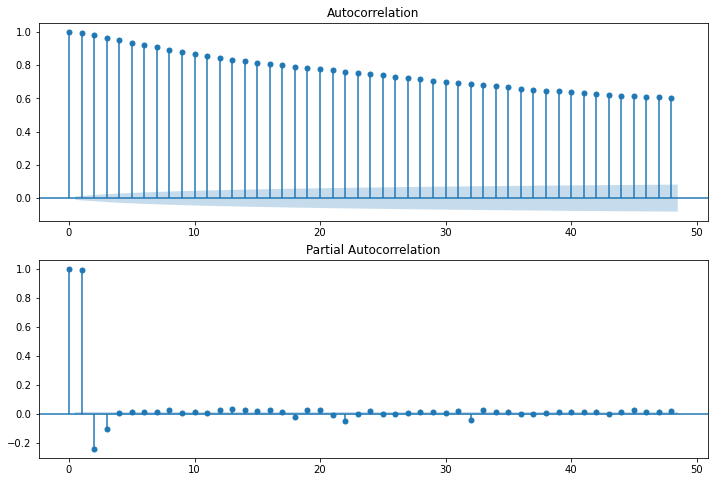

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_gyo1['WL'][1:], lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_gyo1['WL'][1:], lags=48, ax=ax2)

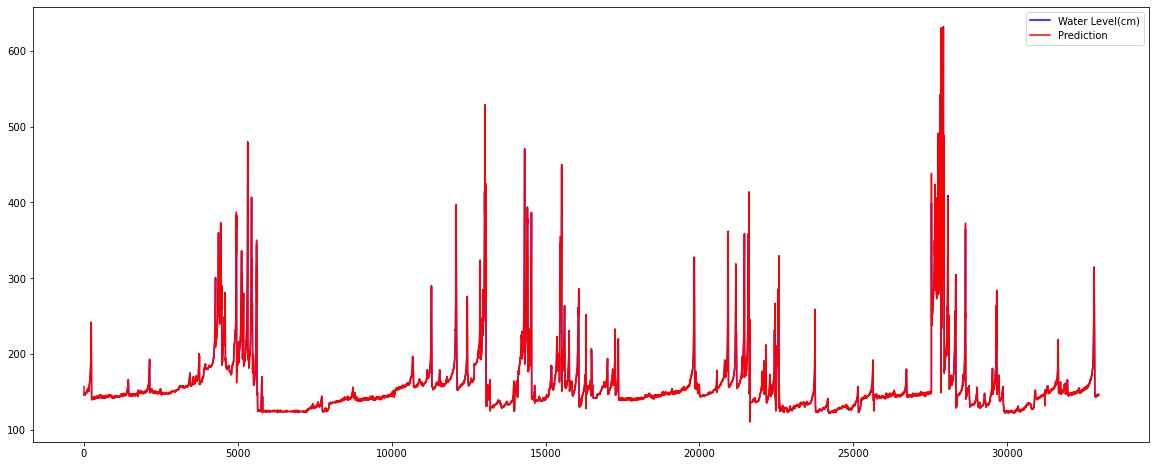

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     WL   No. Observations:                32977
Model:                     ARMA(2, 0)   Log Likelihood              -98640.216
Method:                       css-mle   S.D. of innovations              4.817
Date:                Mon, 24 Aug 2020   AIC                         197288.431
Time:                        07:11:59   BIC                         197322.045
Sample:                             0   HQIC                        197299.168
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.9227      2.653     59.148      0.000     151.723     162.123
ar.L1.WL       1.2325      0.005    230.707      0.000       1.222       1.243
ar.L2.WL      -0.2425      0.005    -45.386      0.000      -0.253      -0.232
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0134           +0.0000j            1.0134            0.0000
AR.2            4.0698           +0.0000j            4.0698            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
## 위 그래프로 봤을 때  AR(2) 모형을 사용
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_gyo1['WL'], order = (2,0,0))
ax = plt.gca()
results = model.fit()
plt.plot(df_gyo1['WL'], color = 'blue')
plt.plot(results.fittedvalues, color = 'red')
ax.legend(['Water Level(cm)', 'Prediction'])

results.summary()

## train데이터 그래프에 왜 안뜨지..